<a href="https://colab.research.google.com/github/kowsalya-gopi/Deeplearning-Image-detection/blob/main/Deep_learning_imagedetectionimage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt
from PIL import Image
import os
from random import shuffle


In [ ]:

TRAIN_DTR='/content/train'
TEST_DTR='/content/train'


In [ ]:
IMG_SIZE=120
MODEL_NAME='NIKEvsADIDAS'



In [ ]:
def label_image(img):
  word_label=img.split('_')[0]
  if word_label=='NIKE':return[1,0]
  elif word_label=='ADIDAS':return[0,1]


In [ ]:
train_data = []
for img in tqdm(os.listdir(TRAIN_DTR)):
    label = label_image(img)
    path = os.path.join(TRAIN_DTR, img)
        ############################################################
        #    This part is different from sentdex's tutorial
        # Chose to use PIL instead of cv2 for image pre-processing
        ############################################################

    img = Image.open(path) #Read image syntax with PIL Library
    img = img.convert('L') #Grayscale conversion with PIL library
    img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS) #Resizing image syntax with PIL Library

        ############################################################

    train_data.append([np.array(img), np.array(label)])
shuffle(train_data)



100%|██████████| 100/100 [00:00<00:00, 280.68it/s]


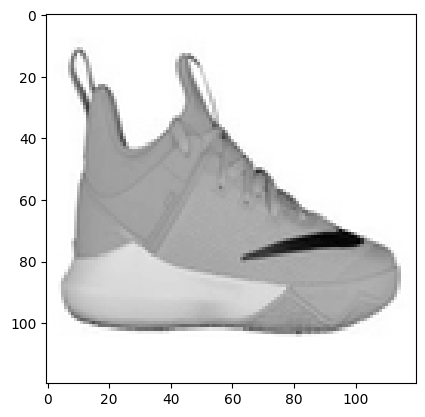

In [ ]:
plt.imshow(train_data[35][0],cmap='gist_gray')
plt.show()


In [ ]:
import keras
from keras.layers import Conv2D,MaxPooling2D
from keras.layers import Dense,Dropout,Flatten,Activation
from keras.models import Sequential



In [ ]:
model = Sequential()

model.add(Conv2D(32,(5,5), activation='relu', input_shape=(120,120,1)))
model.add(Conv2D(32,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(64,(5,5), activation='relu'))
model.add(Conv2D(64,(5,5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax')) #adidas or nike 2 options so last layer has 2 neurons.

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
x = np.array([i[0] for i in train_data]).reshape(-1,IMG_SIZE,IMG_SIZE,1)
y = np.array([i[1] for i in train_data])

model.fit(x,y,epochs=10)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 18s 3s/step - accuracy: 0.4290 - loss: 74.8137
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4065 - loss: 7.1686
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5834 - loss: 0.6911
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.4885 - loss: 0.7336
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4634 - loss: 0.6880
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5665 - loss: 0.6581
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5874 - loss: 0.7807
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.6616 - loss: 0.6053
Epoch 9/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.4913 - loss: 0.6975
Epoch 10/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 21s 3s/step - accuracy: 0.5902 - loss: 0.6234


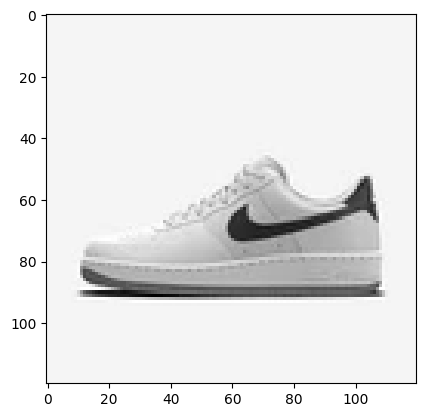

In [ ]:
img = Image.open('/content/niketest.jpeg')
img = img.convert('L')
img = img.resize((IMG_SIZE, IMG_SIZE), Image.Resampling.LANCZOS)
plt.imshow(np.array(img),cmap='gist_gray')
plt.show()

In [ ]:
model.predict(np.array(img).reshape(-1,IMG_SIZE,IMG_SIZE,1))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 199ms/step


array([[0.61703473, 0.38296533]], dtype=float32)